In [84]:
import pandas as pd


In [93]:
medal_count=pd.read_excel("Medals.xlsx")
medal_count

C:\Users\Jay Patel\OneDrive\Documents\Anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimation of location


In [7]:
# mean
medal_count['Total'].mean()

11.612903225806452

In [9]:
# weighted mean for Gold
import numpy as np
np.average(medal_count['Total'],weights=medal_count['Gold'])

46.832352941176474

In [10]:
# weighted mean for Silver
np.average(medal_count['Total'],weights=medal_count['Silver'])

44.994082840236686

In [11]:
# weighted mean for Bronze
np.average(medal_count['Total'],weights=medal_count['Bronze'])

37.17164179104478

In [12]:
# Trimmed Mean- Removed the top or bottom X values from the datasets.Help reduces the impact of outliers
from scipy.stats import trim_mean
trim_mean(medal_count['Gold'],0.1)

1.96

In [13]:
# why its too low? because we have drop top 7-8 rows which contains higher count of golds and removed the bottom 7-8
# rows but that only has zero gold count
list(medal_count['Gold'])

[39,
 38,
 27,
 22,
 20,
 17,
 10,
 10,
 10,
 10,
 7,
 7,
 7,
 7,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
trim_mean(medal_count['Total'],0.1)

6.8933333333333335

In [15]:
# Median
medal_count['Total'].median()

4.0

In [17]:
# Percentile - The value such that p percentile of the data lies below it.
percentile= np.percentile(medal_count['Total'],75)
percentile

11.0

In [18]:
percentile= np.percentile(medal_count['Total'],90)
percentile

31.199999999999974

In [19]:
percentile= np.percentile(medal_count['Total'],99)
percentile

89.99999999999996

In [20]:
 # for example, the 99th percentile on the CAT Score was 156. 
# That means if you scored 156 on the exam, your score was better than 99 percent of test takers.


## Estimate of Variability 

In [21]:
#variance
from statistics import variance
variance(medal_count['Gold'])

49.315100514259

In [23]:
# standard deviation
from statistics import stdev
stdev(medal_count['Gold'])


7.022471111671376

In [26]:
# Mean absolute deviation
from numpy import mean,absolute
mean(absolute(medal_count['Gold'])-mean(medal_count['Gold']))

-2.9605947323337506e-16

In [30]:
## Percentile and Box Plot::
q3,q1=np.percentile(medal_count['Gold'],[75,25])
iqr=q3-q1
iqr

3.0

In [31]:
print(medal_count['Gold'].quantile(0.75) - medal_count['Gold'].quantile(0.25))

3.0


## Exploring the data distribution 

<AxesSubplot:>

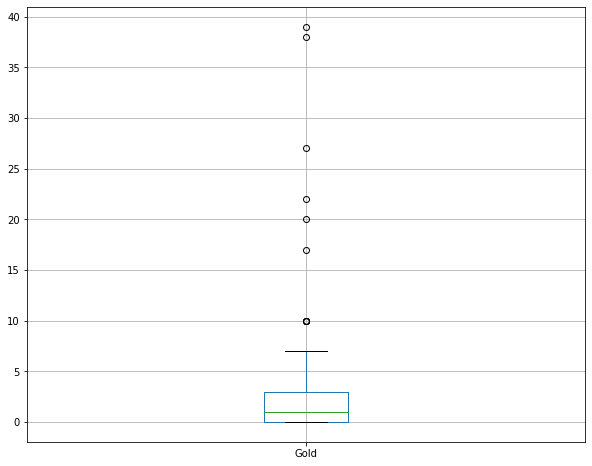

In [33]:
medal_count.boxplot(column='Gold',figsize=(10,8))

In [34]:
# frequency table
pd.cut(medal_count['Gold'],10)

0      (35.1, 39.0]
1      (35.1, 39.0]
2      (23.4, 27.3]
3      (19.5, 23.4]
4      (19.5, 23.4]
          ...      
88    (-0.039, 3.9]
89    (-0.039, 3.9]
90    (-0.039, 3.9]
91    (-0.039, 3.9]
92    (-0.039, 3.9]
Name: Gold, Length: 93, dtype: category
Categories (10, interval[float64]): [(-0.039, 3.9] < (3.9, 7.8] < (7.8, 11.7] < (11.7, 15.6] ... (23.4, 27.3] < (27.3, 31.2] < (31.2, 35.1] < (35.1, 39.0]]

In [41]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [43]:
frequency_table=medal_count.copy()
frequency_table['freq']=pd.cut(medal_count['Gold'],10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [44]:
# Histogram
np.histogram(medal_count['Gold'])

(array([72, 11,  4,  0,  1,  2,  1,  0,  0,  2], dtype=int64),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]))

In [45]:
import matplotlib.pyplot as plt

(array([72., 11.,  4.,  0.,  1.,  2.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <BarContainer object of 10 artists>)

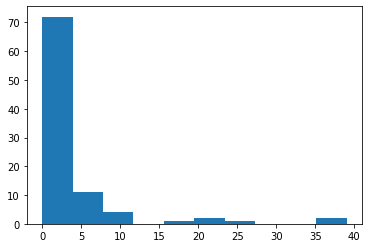

In [46]:
plt.hist(x=medal_count['Gold'])

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

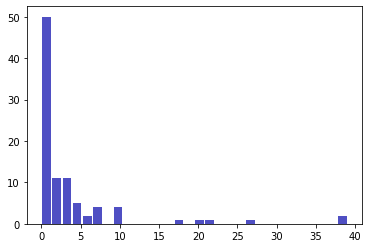

In [49]:
plt.hist(x=medal_count['Gold'],bins='auto',color='#0504aa',alpha=0.7,rwidth=0.85)

<AxesSubplot:ylabel='Density'>

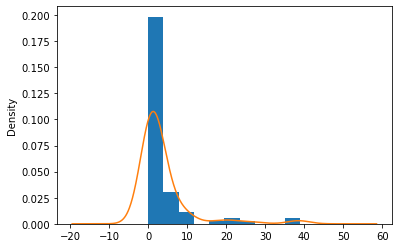

In [56]:
# density plot
ax=medal_count['Gold'].plot.hist(density=True)
medal_count['Gold'].plot.density(ax=ax)

In [63]:
import seaborn as sns

C:\Users\Jay Patel\OneDrive\Documents\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gold', ylabel='Density'>

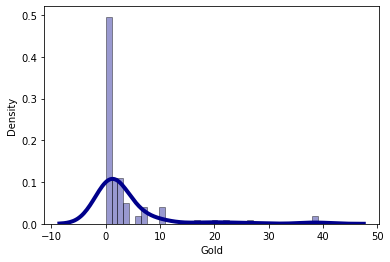

In [64]:
# Density Plot 
sns.distplot(medal_count['Gold'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Jay Patel\OneDrive\Documents\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gold', ylabel='Density'>

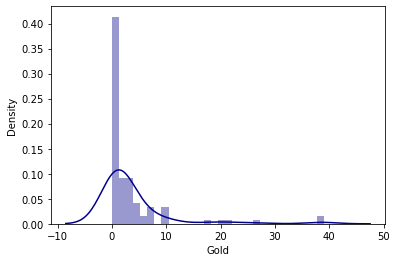

In [65]:
# Density Plot 
sns.distplot(medal_count['Gold'], hist=True, kde=True, color = 'darkblue')

Text(0, 0.5, 'Country')

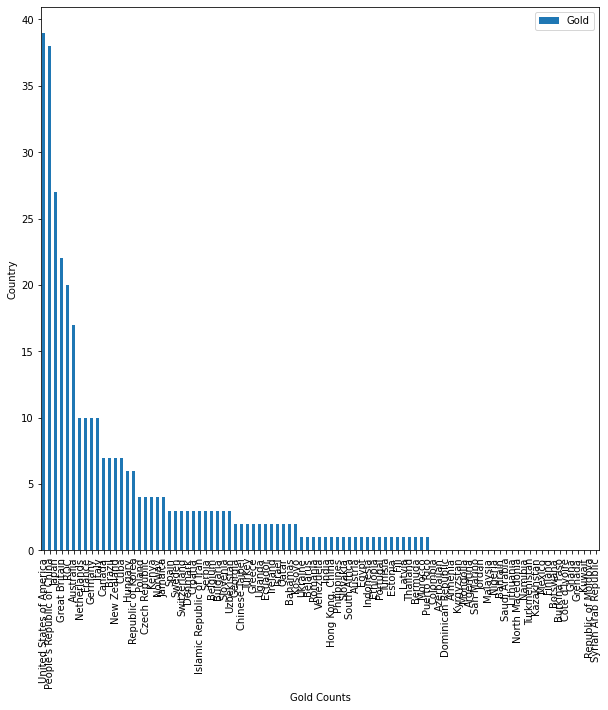

In [67]:
ax=medal_count.plot.bar(x="Team/NOC",y='Gold',figsize=(10,10))
ax.set_xlabel("Gold Counts")
ax.set_ylabel("Country")

Text(0, 0.5, 'Gold Counts')

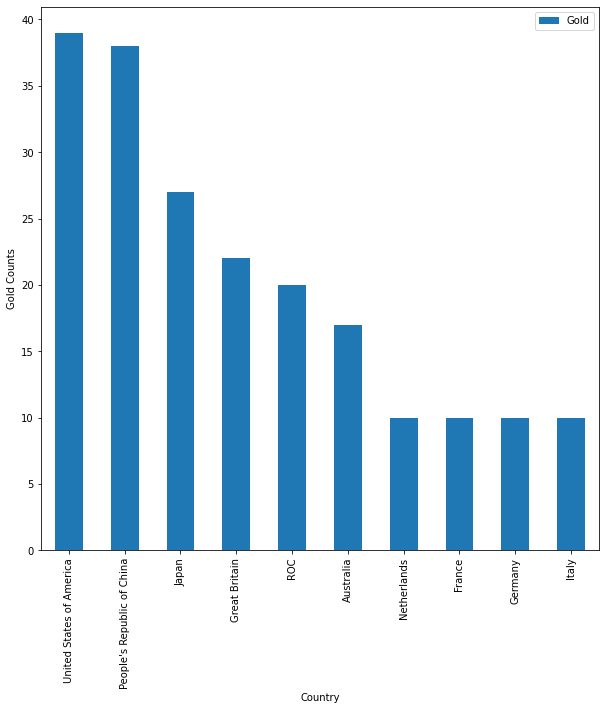

In [71]:
ax=medal_count.iloc[:10].plot.bar(x="Team/NOC",y='Gold',figsize=(10,10))
ax.set_xlabel("Country")
ax.set_ylabel("Gold Counts")

## CORRELATION


In [72]:
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

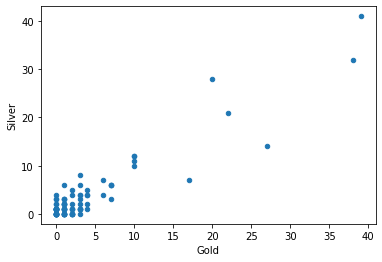

In [73]:
## SCATTER PLOT
medal_count.plot.scatter(x='Gold',y='Silver')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

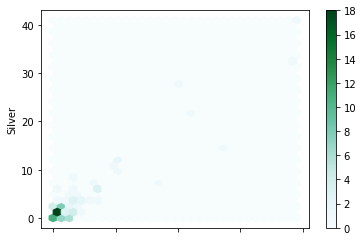

In [74]:
# hexagonal binnig
medal_count.plot.hexbin(x='Gold',y='Silver',gridsize=30)

C:\Users\Jay Patel\OneDrive\Documents\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

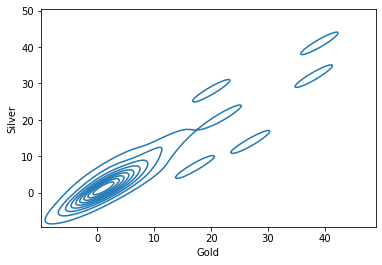

In [75]:
sns.kdeplot(medal_count['Gold'],medal_count['Silver'])

<AxesSubplot:>

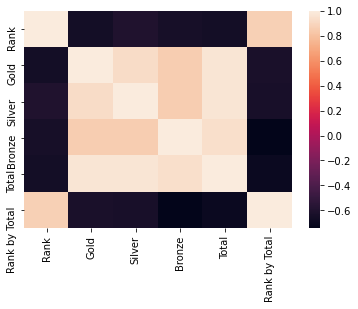

In [81]:
sns.heatmap(data=medal_count.corr())

<AxesSubplot:xlabel='Gold'>

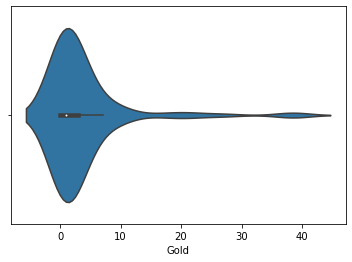

In [82]:
# violin plots
sns.violinplot(x=medal_count['Gold'])